In [1]:
# import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pickle

In [ ]:
pd.read_pickle('')

In [111]:
csr_train = pd.read_pickle('./assets/csr/csr_train_EDAed.pkl')
csr_test  = pd.read_pickle('./assets/csr/csr_test_EDAed.pkl')

In [71]:
csr_train.head()

,serviceorderstatus,status_code,priority,resolved,turnover,PSA,Year,Month,Day,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning
0,CLOSED,NaN,STANDARD,1,306.0,507,2014,1,2,0,0,0,0,0,1
1,CLOSED,NaN,STANDARD,1,94.0,504,2014,1,2,1,0,0,0,0,0
2,CLOSED,NaN,STANDARD,1,288.0,605,2014,1,2,1,0,0,0,0,0
3,OPEN,NaN,STANDARD,0,-0.0,407,2014,1,2,0,0,0,0,0,0
4,CLOSED,NaN,STANDARD,1,120.0,207,2014,1,2,0,0,0,0,1,0


In [112]:
csr_train.drop(['serviceorderstatus', 'status_code', 'priority'], axis=1, inplace=True)
csr_test.drop(['serviceorderstatus', 'status_code', 'priority'], axis=1, inplace=True)

In [113]:
csr_train.head()

,adddate,resolved,turnover,PSA,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning
0,2014-01-02 13:27:40,1,306.0,507,0,0,0,0,0,1
1,2014-01-02 13:46:57,1,94.0,504,1,0,0,0,0,0
2,2014-01-02 13:57:46,1,288.0,605,1,0,0,0,0,0
3,2014-01-02 13:43:20,0,-0.0,407,0,0,0,0,0,0
4,2014-01-02 16:00:59,1,120.0,207,0,0,0,0,1,0


In [79]:
csr_train = pd.DataFrame(csr_train)


In [82]:
count_collection = csr_train['svc_descr_collection'].sum()
count_graffiti = csr_train['svc_descr_graffiti removal'].sum()
count_light = csr_train['svc_descr_light repair'].sum()
count_maintenance = csr_train['svc_descr_maintenance'].sum()
count_parking = csr_train['svc_descr_parking meter repair'].sum()
count_street = csr_train['svc_descr_street cleaning'].sum()

count_collection+count_graffiti+count_light+count_maintenance+count_parking+count_street

782999

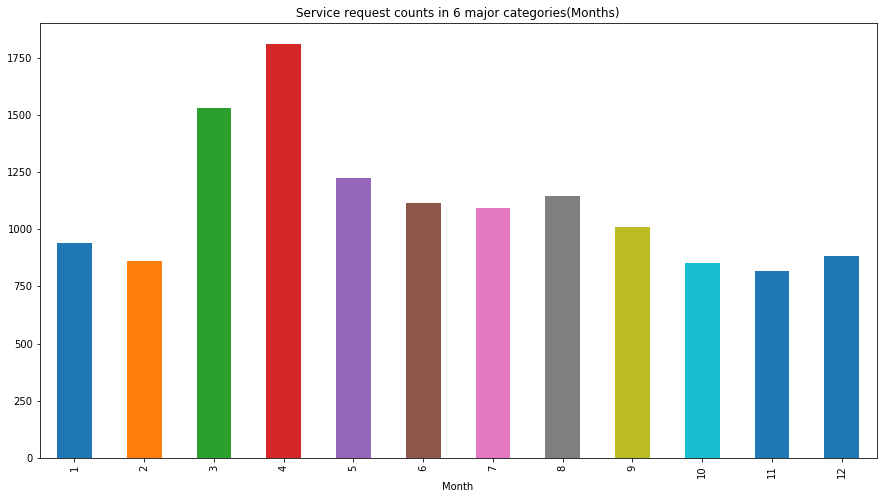

In [21]:

csr_psa_m = csr_train.groupby(['PSA', 'Month'])['svc_descr_collection',
       'svc_descr_graffiti removal', 'svc_descr_light repair',
       'svc_descr_maintenance', 'svc_descr_parking meter repair',
       'svc_descr_street cleaning'].agg('sum')

plt.figure(figsize=(15, 8))
plt.title("Service request counts in 6 major categories(Months)")
foo = csr_psa_m.reset_index()
for bar in foo['PSA'].unique():
    foo[foo['PSA'] == bar].set_index('Month')['svc_descr_collection'].plot(kind='bar');

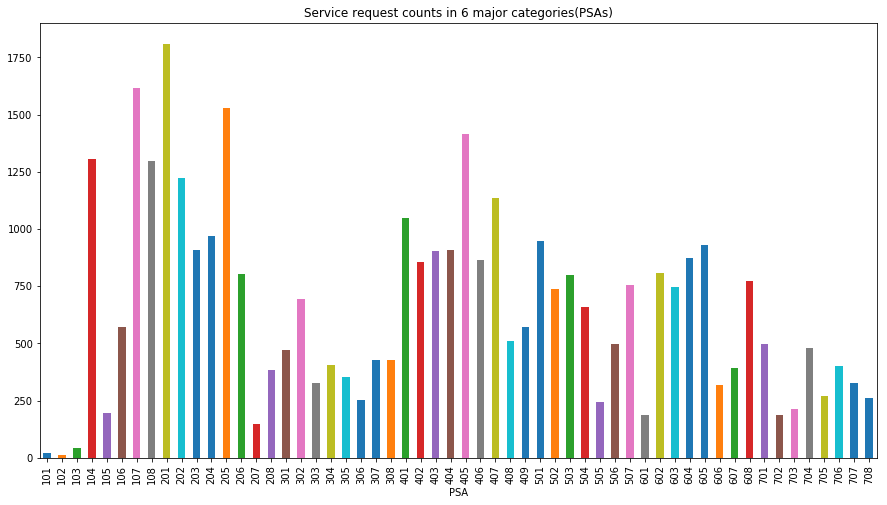

In [11]:
plt.figure(figsize=(15, 8))
plt.title("Service request counts in 6 major categories(PSAs)")
foo = csr_psa_m.reset_index()
for bar in foo['Month'].unique():
    foo[foo['Month'] == bar].set_index('PSA')['svc_descr_collection'].plot(kind='bar');

In [25]:
csr_train2014 = csr_train[csr_train.Year == 2014]
csr_train2015 = csr_train[csr_train.Year == 2015]
csr_train2016 = csr_train[csr_train.Year == 2016]
csr_train2017 = csr_train[csr_train.Year == 2017]

In [61]:
def year_process(df):
    df = df.groupby(['Month'])['svc_descr_collection',
       'svc_descr_graffiti removal', 'svc_descr_light repair',
       'svc_descr_maintenance', 'svc_descr_parking meter repair',
       'svc_descr_street cleaning'].agg('sum')
    df = df.reset_index()
    return df
csr_train = year_process(csr_train)
# csr_train2014 = year_process(csr_train2014)
# csr_train2015 = year_process(csr_train2015)
# csr_train2016 = year_process(csr_train2016)
# csr_train2017 = year_process(csr_train2017)

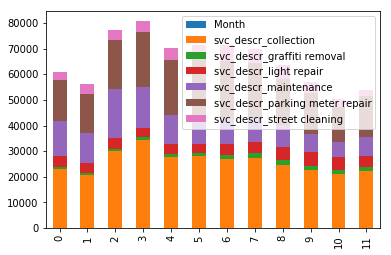

In [64]:
# In [19]: df2.plot.bar(stacked=True);
csr_train.plot.bar(by='Month',stacked=True)

AttributeError: Unknown property stacked

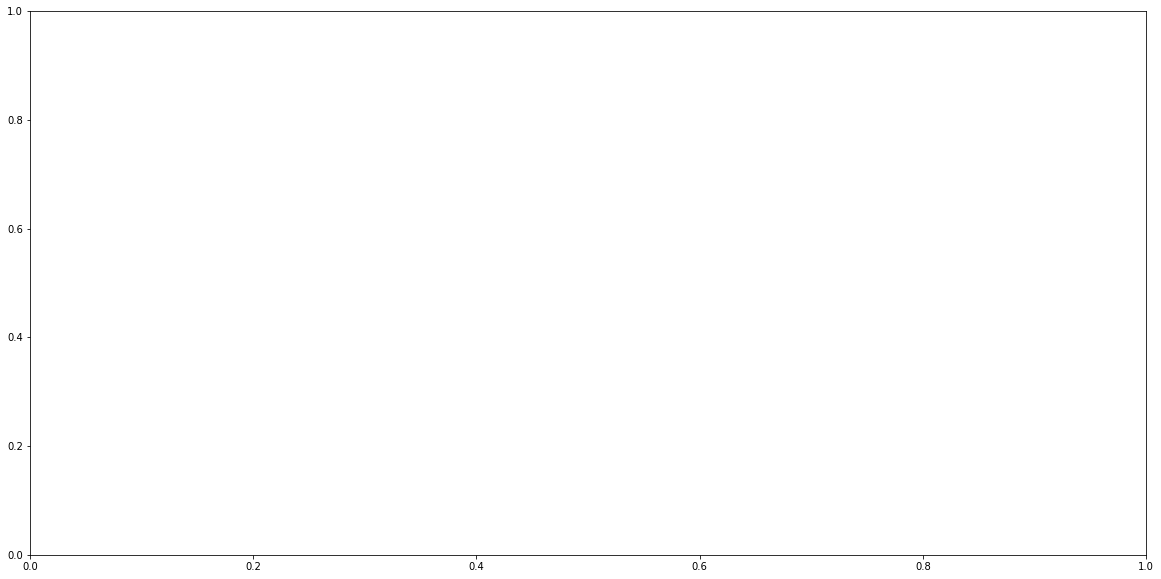

In [62]:
width = 0.2

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(csr_train.Month, height=csr_train.svc_descr_collection, width=width, stacked=True)
# plt.bar(csr_train2015.Month+0.2, height=csr_train2015.svc_descr_collection, width=width, label='2015')
# plt.bar(csr_train2016.Month+0.4, height=csr_train2016.svc_descr_collection, width=width, label='2016')
# plt.bar(csr_train2017.Month+0.6, height=csr_train2017.svc_descr_collection, width=width, label='2017')
plt.xticks(csr_train.Month)
plt.legend();

In [37]:
csr_train.dtypes

resolved                            int64
turnover                          float64
PSA                                 int64
Year                                int64
Month                               int64
Day                                 int64
svc_descr_collection                uint8
svc_descr_graffiti removal          uint8
svc_descr_light repair              uint8
svc_descr_maintenance               uint8
svc_descr_parking meter repair      uint8
svc_descr_street cleaning           uint8
dtype: object

In [69]:
csr_train.svc_descr_collection.count

<bound method Series.count of 0     22985.0
1     20795.0
2     29907.0
3     34538.0
4     27803.0
5     28015.0
6     27139.0
7     27371.0
8     24767.0
9     22473.0
10    21046.0
11    22067.0
Name: svc_descr_collection, dtype: float64>

In [50]:
csr_train.resolved.value_counts(normalize=True)

1    0.930113
0    0.069887
Name: resolved, dtype: float64

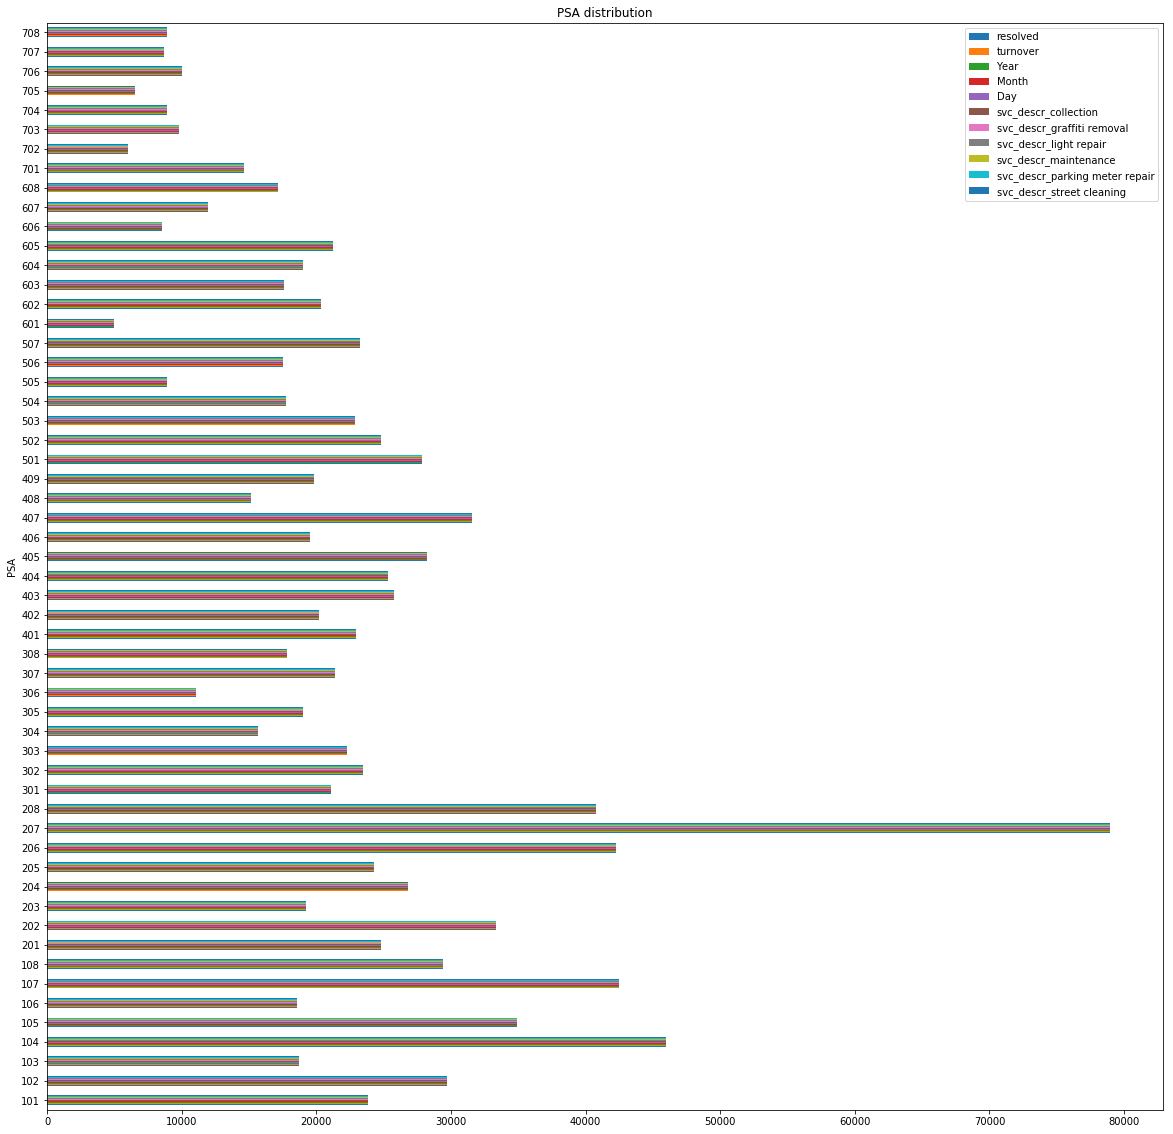

In [60]:
csr_train.groupby('PSA').count().plot(kind='barh', figsize=(20,20))
plt.title("PSA distribution");


##### Let's Plot these
1) svc request counts over PSA
2) svc request counts over Month
3) resolved counts over PSA
4) resolved counts over Month
5) avg turnover over PSA
6) avg turnover over Month
7) agg svc requests by category over PSA

7) agg svc requests by category over PSA

In [ ]:
psa
segments = 6

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors = 'rgbwmc'
patch_handles = []
left = np.zeros

In [33]:
def date_separate(df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['adddate']).year
    df['Month'] = pd.DatetimeIndex(df['adddate']).month
    df['Day'] = pd.DatetimeIndex(df['adddate']).day
    df.drop(['adddate'], axis=1, inplace=True)
    return df

csr_train = date_separate(csr_train)

In [34]:
csr_train.head()

,servicecode,servicecodedescription,servicetypecodedescription,resolutiondate,serviceorderstatus,status_code,servicerequestid,priority,resolved,turnover,PSA,Year,Month,Day
objectid,,,,,,,,,,,,,,
463232,S0011,street cleaning,Street Cleaning,2014-01-15 07:43:42.000000000,CLOSED,NaN,14-00000654,STANDARD,1,306.0,507.0,2014,1,2
463233,S0321,collection,Recycling,2014-01-06 12:39:39.000000000,CLOSED,NaN,14-00000686,STANDARD,1,94.0,504.0,2014,1,2
463234,S0031,collection,Bulk Collection,2014-01-14 14:29:16.000000000,CLOSED,NaN,14-00000707,STANDARD,1,288.0,605.0,2014,1,2
463235,S0311,pesticide,DOH,1753-08-29 22:43:41.128654848,OPEN,NaN,14-00000677,STANDARD,0,-0.0,407.0,2014,1,2
463236,S0276,parking meter repair,TOA,2014-01-07 16:33:48.000000000,CLOSED,NaN,14-00000877,STANDARD,1,120.0,207.0,2014,1,2


In [35]:
csr_train.dtypes

servicecode                           object
servicecodedescription                object
servicetypecodedescription            object
resolutiondate                datetime64[ns]
serviceorderstatus                    object
status_code                           object
servicerequestid                      object
priority                              object
resolved                               int64
turnover                             float64
PSA                                  float64
Year                                   int64
Month                                  int64
Day                                    int64
dtype: object

In [36]:
csr_train = csr_train.reset_index()

csr_train.drop(['servicerequestid', 'servicetypecodedescription', 
                'objectid', 'servicecode', 'resolutiondate'], axis=1, inplace=True)

In [38]:
csr_train.head()

,servicecodedescription,serviceorderstatus,status_code,priority,resolved,turnover,PSA,Year,Month,Day
0,street cleaning,CLOSED,NaN,STANDARD,1,306.0,507.0,2014,1,2
1,collection,CLOSED,NaN,STANDARD,1,94.0,504.0,2014,1,2
2,collection,CLOSED,NaN,STANDARD,1,288.0,605.0,2014,1,2
3,pesticide,OPEN,NaN,STANDARD,0,-0.0,407.0,2014,1,2
4,parking meter repair,CLOSED,NaN,STANDARD,1,120.0,207.0,2014,1,2


In [40]:
csr_train.isnull().sum()

servicecodedescription         0
serviceorderstatus           853
status_code               151801
priority                    2677
resolved                       0
turnover                       0
PSA                            0
Year                           0
Month                          0
Day                            0
dtype: int64

In [41]:
csr_train.PSA=csr_train.PSA.astype(int)

In [43]:
csr_train.groupby(['PSA', 'servicecodedescription']).count()

serviceorderstatus  status_code  priority  \
PSA servicecodedescription                                              
101 bicycle                                161          157       141   
    collection                             110          103       110   
    dc gov                                  54           50        54   
    dmv related                             57           56        57   
    dumping                                 17           14        17   
    graffiti removal                        70           69        70   
    light repair                           552          538       552   
    maintenance                           1239         1085      1239   
    parking enforcement                   2922         2690      2922   
    parking meter repair                 16873        13978     16873   
    pesticide                              117          117       117   
    report                                 195          165       195   
    safety                                 100           82        98   
    sanitation                              35           32        35   
    signs                                  826          807       826   
    snow related                            54           48        53   
    street cleaning                        101           96       101   
    transportation                          63           57        63   
    tree related                           278          259       278   
102 bicycle                                 98           92        86   
    collection                              75           65        75   
    dc gov                                 130          129       130   
    dmv related                           1637         1638      1637   
    dumping                                 40           38        40   
    graffiti removal                       130          130       130   
    light repair                           484          465       484   
    maintenance                           1199         1087      1199   
    parking enforcement                   2641         2401      2641   
    parking meter repair                 21180        15670     21180   
    pesticide                              114          114       114   
...                                        ...          ...       ...   
707 parking enforcement                    946          839       946   
    parking meter repair                     4            4         4   
    pesticide                               97           95        97   
    report                                 112          100       112   
    safety                                 152          142       149   
    sanitation                             424          391       424   
    signs                                  148          138       148   
    snow related                           243          211       242   
    street cleaning                        735          670       735   
    transportation                          66           61        66   
    tree related                           288          271       288   
708 bicycle                                  3            3         3   
    collection                            2779         2399      2777   
    dc gov                                  16           15        16   
    dmv related                            415          415       415   
    dumping                                167          161       167   
    graffiti removal                        10           10        10   
    light repair                           364          339       364   
    maintenance                           1515         1401      1515   
    parking enforcement                   1668         1588      1668   
    parking meter repair                     9            8         9   
    pesticide                               50           47        50   
    report   

In [44]:
csr_train.rename({'servicecodedescription': 'svc_descr'}, axis=1, inplace=True)

In [45]:
csr_train.svc_descr.value_counts()

collection              308906
parking meter repair    223574
parking enforcement     206176
maintenance             130817
tree related             54692
light repair             52047
street cleaning          51731
signs                    41400
sanitation               29834
dmv related              23652
snow related             21505
dumping                  20510
graffiti removal         15924
pesticide                14497
report                   11253
safety                   10129
transportation            5893
bicycle                   5052
dc gov                    3630
Name: svc_descr, dtype: int64

In [46]:
csr_train['svc_descr'] = [type_ if type_ in ['collection', 'maintenance', 
                                             'light repair','graffiti removal',
                                             'street cleaning', 'parking meter repair']
                      else "OTHER" for type_ in csr_train['svc_descr']]

In [47]:
csr_train['svc_descr'].value_counts()

OTHER                   448223
collection              308906
parking meter repair    223574
maintenance             130817
light repair             52047
street cleaning          51731
graffiti removal         15924
Name: svc_descr, dtype: int64

In [48]:
csr_train = pd.get_dummies(csr_train, columns=['svc_descr'], drop_first=True)
csr_train.head()

,serviceorderstatus,status_code,priority,resolved,turnover,PSA,Year,Month,Day,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning
0,CLOSED,NaN,STANDARD,1,306.0,507,2014,1,2,0,0,0,0,0,1
1,CLOSED,NaN,STANDARD,1,94.0,504,2014,1,2,1,0,0,0,0,0
2,CLOSED,NaN,STANDARD,1,288.0,605,2014,1,2,1,0,0,0,0,0
3,OPEN,NaN,STANDARD,0,-0.0,407,2014,1,2,0,0,0,0,0,0
4,CLOSED,NaN,STANDARD,1,120.0,207,2014,1,2,0,0,0,0,1,0


In [49]:
cats = ['svc_descr_collection','svc_descr_maintenance',
     'svc_descr_light repair', 'svc_descr_graffiti removal',
     'svc_descr_street cleaning', 'svc_descr_parking meter repair']

In [50]:
csr_train.groupby(['PSA', 'Year', 'Month'])[cats].agg(sum)

svc_descr_collection  svc_descr_maintenance  \
PSA Year Month                                                
101 2014 1                       0.0                   31.0   
         2                       0.0                   45.0   
         3                       1.0                   38.0   
         4                       3.0                   47.0   
         5                       2.0                   49.0   
         6                       2.0                   21.0   
         7                       0.0                   38.0   
         8                       2.0                    7.0   
         9                       0.0                   18.0   
         10                      2.0                   29.0   
         11                      1.0                   23.0   
         12                      0.0                   13.0   
    2015 1                       2.0                   20.0   
         2                       0.0                   24.0   
         3                       0.0                   61.0   
         4                       0.0                   96.0   
         5                       0.0                   17.0   
         6                       0.0                   18.0   
         7                       4.0                    6.0   
         8                       2.0                   27.0   
         9                       0.0                   19.0   
         10                      2.0                   12.0   
         11                      4.0                   10.0   
         12                      5.0                   19.0   
    2016 1                       2.0                    5.0   
         2                       0.0                   44.0   
         3                       2.0                   41.0   
         4                       0.0                   38.0   
         5                       2.0                   34.0   
         6                       0.0                   25.0   
...                              ...                    ...   
708 2015 7                      61.0                   29.0   
         8                      47.0                   19.0   
         9                      70.0                   13.0   
         10                     59.0                   19.0   
         11                     47.0                    9.0   
         12                     66.0                   29.0   
    2016 1                      38.0                   80.0   
         2                      49.0                   55.0   
         3                      53.0                   74.0   
         4                      49.0                   32.0   
         5                      48.0                   35.0   
         6                      75.0                   29.0   
         7                      61.0                   51.0   
         8                      71.0                   34.0   
         9                      62.0                   25.0   
         10                     53.0                   21.0   
         11                     61.0                   21.0   
         12                     61.0                   22.0   
    2017 1                      52.0                   32.0   
         2                      47.0                   50.0   
         3                      60.0                   33.0   
         4                      62.0                   23.0   
         5                      54.0                   30.0   
         6                      52.0                   24.0   
         7                      59.0                   23.0   
         8                      60.0                   38.0   
         9                      55.0                   23.0   
         10                     53.0                   14.0   
         11                     63.0                   36.0   
         12                     41.0                   35.0   

                svc_descr_light repair  svc_de

In [51]:
csr_train.groupby(['PSA'])['svc_descr_collection',
                           'svc_descr_maintenance',
                           'svc_descr_light repair',
                           'svc_descr_graffiti removal',
                           'svc_descr_street cleaning',
                           'svc_descr_parking meter repair'].agg(sum)

,svc_descr_collection,svc_descr_maintenance,svc_descr_light repair,svc_descr_graffiti removal,svc_descr_street cleaning,svc_descr_parking meter repair
PSA,,,,,,
101,110.0,1239.0,552.0,70.0,101.0,16889.0
102,75.0,1199.0,484.0,130.0,101.0,21196.0
103,367.0,1870.0,441.0,61.0,271.0,10506.0
104,11739.0,2864.0,1118.0,492.0,3240.0,4654.0
105,1325.0,2611.0,712.0,131.0,362.0,17447.0
106,4017.0,1587.0,806.0,102.0,473.0,3650.0
107,11967.0,3116.0,1850.0,179.0,1316.0,7090.0
108,11287.0,2967.0,1314.0,102.0,2075.0,205.0
201,9958.0,3936.0,2448.0,78.0,333.0,1459.0


In [ ]:
csr_train.PSA.

In [ ]:
plt.bar(csr_train.Month, csr_train.svc_descr_collection)

KeyboardInterrupt: 

KeyboardInterrupt: 

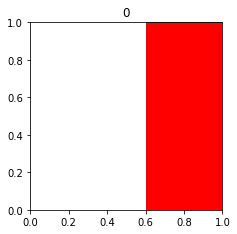

In [82]:
plt.figure(figsize=(20,20))
for i in range(1,8):
    plt.subplot(5,5,i)
    plt.title(csr_train.PSA.index.values[i-1])
    plt.bar(csr_train.Month, csr_train.svc_descr_collection.sum(), color='r' )

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

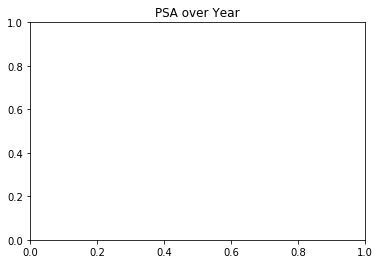

In [25]:
plt.title('PSA over Year')

csr_train.groupby(pd.Grouper(key='PSA', freq='M')).size().plot()


In [32]:
plt.rcParams['agg.path.chunksize'] = 10000

In [83]:
single_shot_dum = pd.read_pickle('./assets/single_shot_dum.pkl')

In [84]:
single_shot_dum.head()

,type_single_gunshot,median_sale_price,homes_sold,homes_sold_mom,days_on_market,average_sale_to_list_mom,day,turnover,resolved,svc_descr_collection,...,month_4,month_5,month_6,month_7,month_8,month_9,year_2014,year_2015,year_2016,year_2017
0,0,439.884615,44.551923,2.238654,28.075000,0.010769,1,2513.615385,13.0,3.0,...,0,0,0,0,0,0,1,0,0,0
1,0,439.884615,44.551923,2.238654,28.075000,0.010769,1,2513.615385,13.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2,0,439.884615,44.551923,2.238654,28.075000,0.010769,1,2513.615385,13.0,3.0,...,0,0,0,0,0,0,1,0,0,0
3,0,263.845216,49.532371,2.641155,26.962576,0.000000,1,1316.727273,11.0,5.0,...,0,0,0,0,0,0,1,0,0,0
4,0,529.472441,60.267717,4.043307,19.909449,-0.020079,1,106.181818,22.0,6.0,...,0,0,0,0,0,0,1,0,0,0


In [91]:
single_shot_dum.svc_descr_maintenance.value_counts()

3.0      3781
1.0      2749
4.0      2594
2.0      2503
0.0      2127
8.0      1807
7.0      1245
5.0      1193
6.0      1092
12.0     1080
9.0       966
11.0      915
10.0      721
13.0      648
14.0      607
15.0      515
16.0      421
18.0      340
17.0      308
20.0      214
19.0      212
21.0      178
22.0      135
23.0      128
24.0      119
25.0      100
29.0       63
31.0       60
26.0       58
27.0       52
         ... 
163.0       3
81.0        3
101.0       3
47.0        3
208.0       3
59.0        3
80.0        2
150.0       2
95.0        2
76.0        2
96.0        2
89.0        2
75.0        2
210.0       2
107.0       2
84.0        2
93.0        2
339.0       2
87.0        2
262.0       2
68.0        2
85.0        1
60.0        1
72.0        1
91.0        1
104.0       1
174.0       1
61.0        1
92.0        1
66.0        1
Name: svc_descr_maintenance, Length: 99, dtype: int64

In [86]:
single_shot_dum.columns

Index(['type_single_gunshot', 'median_sale_price', 'homes_sold',
       'homes_sold_mom', 'days_on_market', 'average_sale_to_list_mom', 'day',
       'turnover', 'resolved', 'svc_descr_collection',
       'svc_descr_graffiti removal', 'svc_descr_light repair',
       'svc_descr_maintenance', 'svc_descr_parking meter repair',
       'svc_descr_street cleaning', 'district_1', 'district_2', 'district_3',
       'district_4', 'district_5', 'district_6', 'district_7', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'year_2014',
       'year_2015', 'year_2016', 'year_2017'],
      dtype='object')

In [88]:
single_shot_grouped = single_shot_dum.groupby(['district_1','svc_descr_maintenance'])

In [90]:
single_shot_grouped.svc_descr_collection.value_counts()

district_1  svc_descr_maintenance  svc_descr_collection
0           0.0                    1.0                     457
                                   0.0                     294
                                   2.0                     276
                                   4.0                     250
                                   6.0                     146
                                   7.0                     111
                                   8.0                      88
                                   5.0                      81
                                   9.0                      81
                                   3.0                      64
                                   10.0                     57
                                   11.0                     27
                                   12.0                     20
                                   13.0                     17
                                   15.0                     16

In [92]:
df = pd.read_pickle('./assets/shots_spot_train.pkl')

In [93]:
df.head()

,type_multiple_gunshots,type_single_gunshot,district,median_sale_price,homes_sold,homes_sold_mom,days_on_market,average_sale_to_list_mom,year,month,day,turnover,resolved,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning
0,1,0,5,439.884615,44.551923,2.238654,28.075000,0.010769,2014,1,1,2513.615385,13.0,3.0,2.0,4.0,2.0,0.0,0.0
1,1,0,5,439.884615,44.551923,2.238654,28.075000,0.010769,2014,1,1,2513.615385,13.0,3.0,2.0,4.0,2.0,0.0,0.0
2,1,0,5,439.884615,44.551923,2.238654,28.075000,0.010769,2014,1,1,2513.615385,13.0,3.0,2.0,4.0,2.0,0.0,0.0
3,1,0,7,263.845216,49.532371,2.641155,26.962576,0.000000,2014,1,1,1316.727273,11.0,5.0,0.0,3.0,1.0,0.0,0.0
4,1,0,1,529.472441,60.267717,4.043307,19.909449,-0.020079,2014,1,1,106.181818,22.0,6.0,0.0,0.0,0.0,11.0,0.0


In [97]:
df.groupby(['district'])['median_sale_price', 'homes_sold','homes_sold_mom','days_on_market','average_sale_to_list_mom'].mean()

,median_sale_price,homes_sold,homes_sold_mom,days_on_market,average_sale_to_list_mom
district,,,,,
1,529.472441,60.267717,4.043307,19.909449,-0.020079
2,599.477273,51.561189,2.186014,27.157343,0.009091
3,596.480769,69.507692,1.233462,16.553846,0.009231
4,492.116129,45.190323,3.447419,27.951613,0.000968
5,439.884615,44.551923,2.238654,28.075000,0.010769
6,238.653846,26.115385,2.698077,42.128205,0.029487
7,263.845216,49.532371,2.641155,26.962576,0.000000


In [99]:
df.groupby(['district'])['turnover','resolved'].mean()

,turnover,resolved
district,,
1,563.529090,128.688705
2,249.000000,21.000000
3,447.014368,61.508514
4,756.225857,66.609546
5,663.310478,55.809402
6,464.038405,64.186926
7,469.396751,37.065273


In [100]:
df.groupby(['district'])['turnover','resolved'].count()

,turnover,resolved
district,,
1,1452,1452
2,1,1
3,1292,1292
4,3017,3017
5,3914,3914
6,7618,7618
7,10142,10142


In [109]:
df[(df['district'] == 2 )& (df['resolved']>5)]

,type_multiple_gunshots,type_single_gunshot,district,median_sale_price,homes_sold,homes_sold_mom,days_on_market,average_sale_to_list_mom,year,month,day,turnover,resolved,svc_descr_collection,svc_descr_graffiti removal,svc_descr_light repair,svc_descr_maintenance,svc_descr_parking meter repair,svc_descr_street cleaning
